In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Input Data Description
1. The origins of your data. Where did you get the data? How were the data collected from the original sources?  
2. The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data. To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time). At a minimum, use some basic methods (.head, .loc, and so on) to provide support for the descriptions you provide for SGSTF.

This dataset was obtained from the CoolClimate API. The carbon footprint calculator is a tool created by the CoolClimate Network. This calculator allows households to calculate their total carbon footprints by inputting certain values into the calculator. Some of these group of inputs include:
- number of adults/children in household
- transportation
- housing
- shopping foods and goods

We are trying to replicate this carbon footprint calculator for our final project. We are, however, planning to use less features. The "input_footprint" variables are the features the user inputs their values. Since we are also creating a calculator, we will be mostly focusing on the "input_footprint" variables as our features. Credentials were needed in order to access the api. We wrote code, using the app key given to us, to extract the data from the API. Below is the csv file we created after getting the data.

### Data Acquisition and EDA:Structure

After extracting the data from the API, we turned the dataset into a csv file. Each entry is a household and its values for each corresponding variable. We convert this csv file into a pandas dataframe by doing pd.read_csv.

Overall, we see there are 1290 rows and 337 column to explore. 

In [62]:
coolClimate = pd.read_csv('../../data/coolclimate-api-CAzips-singlehouseholds-withzc.csv')
coolClimate.head()
coolClimate.shape



(1290, 337)

In [69]:
coolClimate.head()

,Unnamed: 0,failed,error_code,input_location_mode,input_size,input_income,input_population,input_changed,input_footprint_household_adults,input_footprint_household_children,...,result_takeaction_low_carbon_diet_meatcal,result_takeaction_low_carbon_diet_dairycal,result_takeaction_low_carbon_diet_fvcal,result_takeaction_low_carbon_diet_cerealscal,result_takeaction_low_carbon_diet_othercal,result_takeaction_low_carbon_diet_totalcal,result_takeaction_offset_shopping_transtonsleft,result_takeaction_offset_shopping_transpledges,internal_vehiclemiles,Zip Code
0,0,NaN,NaN,1.0,1.0,1.0,54587.0,0.0,1.0,0.0,...,244.35,185.9,487.8,970.05,331.2,2219.3,8.859825,0.0,8669.126912,90001.0
1,0,NaN,NaN,1.0,1.0,1.0,44342.0,0.0,1.0,0.0,...,244.35,185.9,487.8,970.05,331.2,2219.3,8.661071,0.0,8490.736995,90002.0
2,0,NaN,NaN,1.0,1.0,1.0,59003.0,0.0,1.0,0.0,...,244.35,185.9,487.8,970.05,331.2,2219.3,8.578153,0.0,7986.883857,90003.0
3,0,NaN,NaN,1.0,1.0,1.0,67859.0,0.0,1.0,0.0,...,244.35,185.9,487.8,970.05,331.2,2219.3,8.836064,0.0,7308.903795,90004.0
4,0,NaN,NaN,1.0,1.0,1.0,43032.0,0.0,1.0,0.0,...,244.35,185.9,487.8,970.05,331.2,2219.3,8.206639,0.0,6013.991938,90005.0


<h1> EDA: Granularity/Temporality/Scope </h1>

In terms of the granularity, each row of data represents a household's **estimated** carbon emissions. Each household has its own values in each column.  

The scope of this dataset is all the Zip Codes in California. 

Below is the list of all the Zip Codes each household is located in. Out of those 1290 entries, 1018 of them are unique zip codes.

In [78]:
coolClimate['Zip Code']

0       90001.0
1       90002.0
2       90003.0
3       90004.0
4       90005.0
         ...   
1285    96052.0
1286    96054.0
1287    96055.0
1288    96056.0
1289    96057.0
Name: Zip Code, Length: 1290, dtype: float64

In [80]:
len(coolClimate['Zip Code'].unique())

1018

---

## Data Cleaning

First, I dropped the columns: "Unnamed: 0", "failed", and "error_code". Those columns had a buch of NaN and 0 values and were not useful overall for modelling.

In [18]:
coolClimate = coolClimate.drop(columns=['Unnamed: 0', 'failed', 'error_code'])


In [41]:
result_grand_total = coolClimate['result_grand_total']

In [36]:
coolClimate = coolClimate.drop(columns=[col for col in coolClimate.columns if re.findall('result_', col) or 
                         re.findall('input_takeaction', col)])
coolClimate['result_grand_total'] = result_grand_total

In [42]:
coolClimate.head()

,input_location_mode,input_size,input_income,input_population,input_changed,input_footprint_household_adults,input_footprint_household_children,input_footprint_transportation_num_vehicles,input_footprint_transportation_miles1,input_footprint_transportation_mpg1,...,input_footprint_shopping_services_education,input_footprint_shopping_services_communications,input_footprint_shopping_services_vehicleservices,input_footprint_shopping_services_finance,input_footprint_shopping_services_household,input_footprint_shopping_services_charity,input_footprint_shopping_services_miscservices,internal_vehiclemiles,Zip Code,result_grand_total
0,1.0,1.0,1.0,54587.0,0.0,1.0,0.0,1.0,8700.0,22.0,...,55.002939,68.914804,79.794340,198.158342,7.374938,30.289815,45.744402,8669.126912,90001.0,18.998752
1,1.0,1.0,1.0,44342.0,0.0,1.0,0.0,1.0,8500.0,22.0,...,51.436731,66.737767,77.481503,188.724388,7.386024,31.860650,44.979533,8490.736995,90002.0,18.960587
2,1.0,1.0,1.0,59003.0,0.0,1.0,0.0,1.0,8000.0,22.0,...,49.867708,65.743193,76.508415,184.598783,7.423321,32.901728,44.728756,7986.883857,90003.0,18.488686
3,1.0,1.0,1.0,67859.0,0.0,1.0,0.0,1.0,7300.0,22.0,...,45.315034,58.737260,78.593248,175.379798,11.111460,74.548311,53.466896,7308.903795,90004.0,18.001409
4,1.0,1.0,1.0,43032.0,0.0,1.0,0.0,1.0,6000.0,22.0,...,37.588628,55.664159,71.624654,153.844125,9.707643,62.545779,48.034396,6013.991938,90005.0,16.311888


<h1> Visualizations </h1>

Below are some interesting visualizations we created that show immediate relationships in the data. Below we have plotted:
- The relationship between input_footprint_shopping_services_household and the result_grand_total
- 

In [47]:
coolClimate.columns

Index(['input_location_mode', 'input_size', 'input_income', 'input_population',
       'input_changed', 'input_footprint_household_adults',
       'input_footprint_household_children',
       'input_footprint_transportation_num_vehicles',
       'input_footprint_transportation_miles1',
       'input_footprint_transportation_mpg1',
       ...
       'input_footprint_shopping_services_education',
       'input_footprint_shopping_services_communications',
       'input_footprint_shopping_services_vehicleservices',
       'input_footprint_shopping_services_finance',
       'input_footprint_shopping_services_household',
       'input_footprint_shopping_services_charity',
       'input_footprint_shopping_services_miscservices',
       'internal_vehiclemiles', 'Zip Code', 'result_grand_total'],
      dtype='object', length=117)

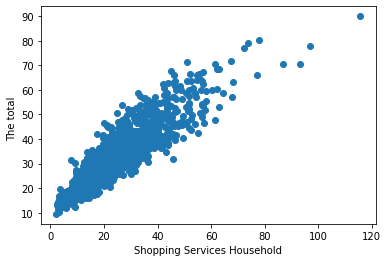

In [45]:
X = coolClimate['input_footprint_shopping_services_household']
y = coolClimate['result_grand_total']
plt.scatter(X,y)
plt.xlabel("Shopping Services Household")
plt.ylabel("The total  ")
plt.title('')
plt.show()

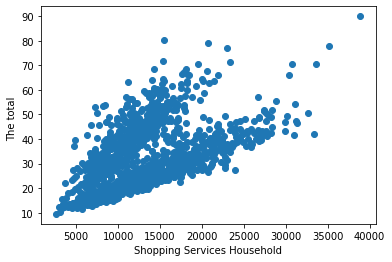

In [50]:
X = coolClimate['input_footprint_transportation_miles1']
y = coolClimate['result_grand_total']
plt.scatter(X,y)
plt.xlabel("Shopping Services Household")
plt.ylabel("The total  ")
plt.title('')
plt.show()

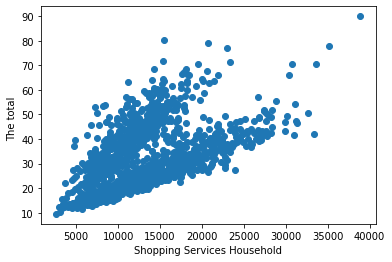

In [59]:
X = coolClimate['input_footprint_transportation_miles1']
y = coolClimate['result_grand_total']
plt.scatter(X,y)
plt.xlabel("Shopping Services Household")
plt.ylabel("The total  ")
plt.title('')
plt.show()

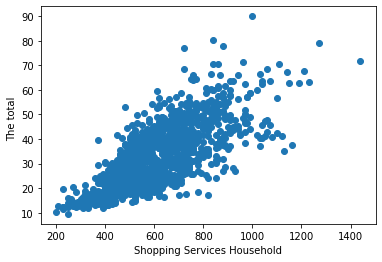

In [52]:
X = coolClimate['input_footprint_housing_electricity_dollars']
y = coolClimate['result_grand_total']
plt.scatter(X,y)
plt.xlabel("Shopping Services Household")
plt.ylabel("The total  ")
plt.title('')
plt.show()

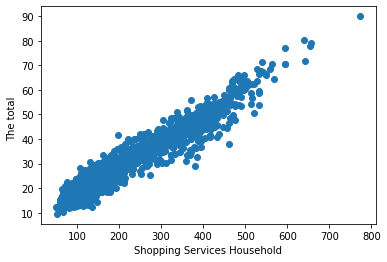

In [56]:
X = coolClimate['input_footprint_shopping_goods_clothing']
y = coolClimate['result_grand_total']
plt.scatter(X,y)
plt.xlabel("Shopping Services Household")
plt.ylabel("The total  ")
plt.title('')
plt.show()

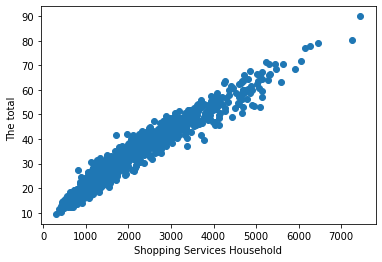

In [57]:
X = coolClimate['input_footprint_shopping_services_total']
y = coolClimate['result_grand_total']
plt.scatter(X,y)
plt.xlabel("Shopping Services Household")
plt.ylabel("The total  ")
plt.title('')
plt.show()